In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.io import arff
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import os, shutil

In [10]:
file_list=['BTC-all','ETH-all','BNB-all']#
seasonal_period_list=[30,60]

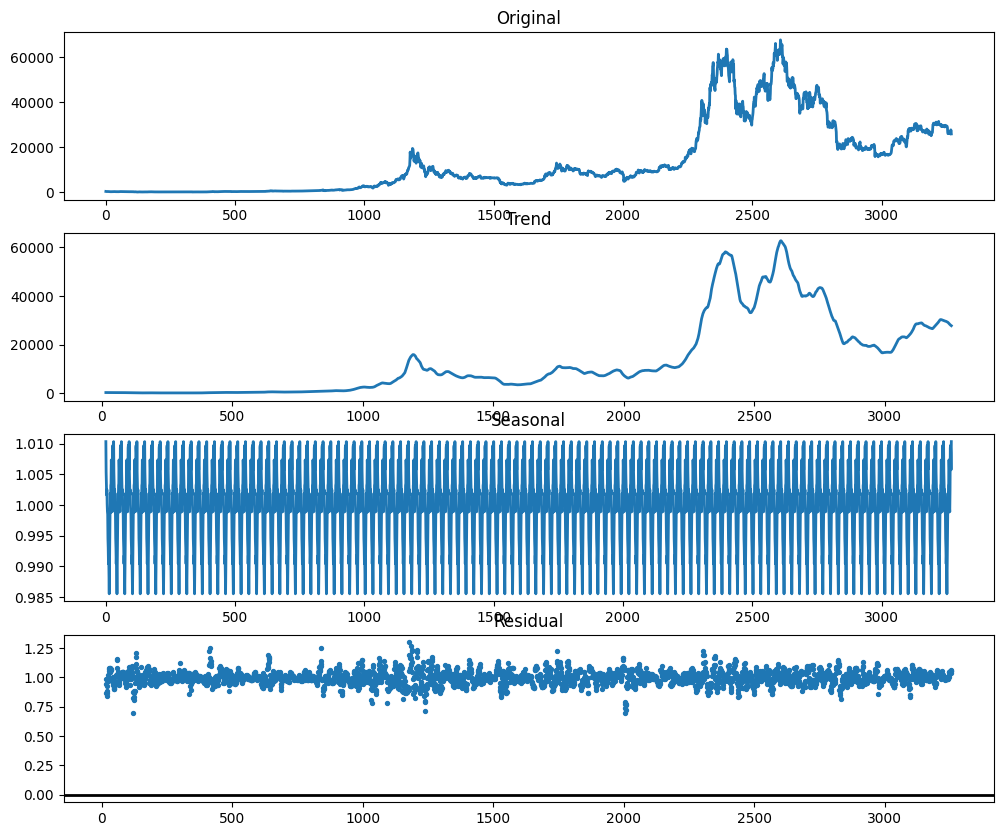

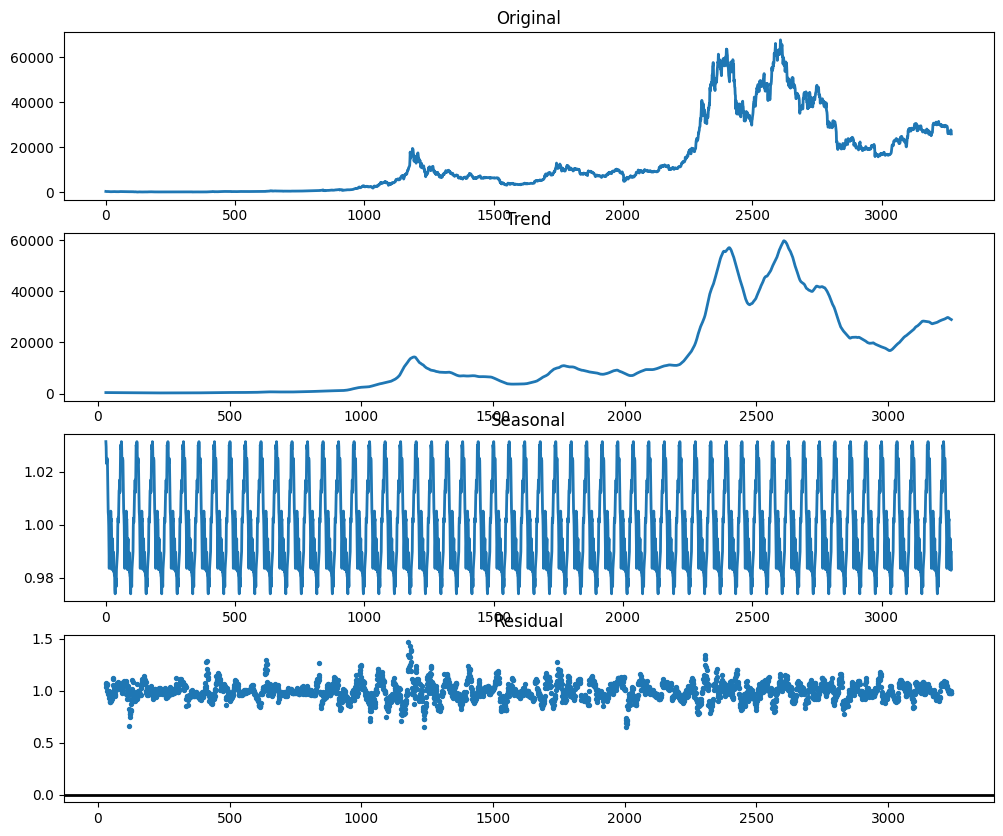

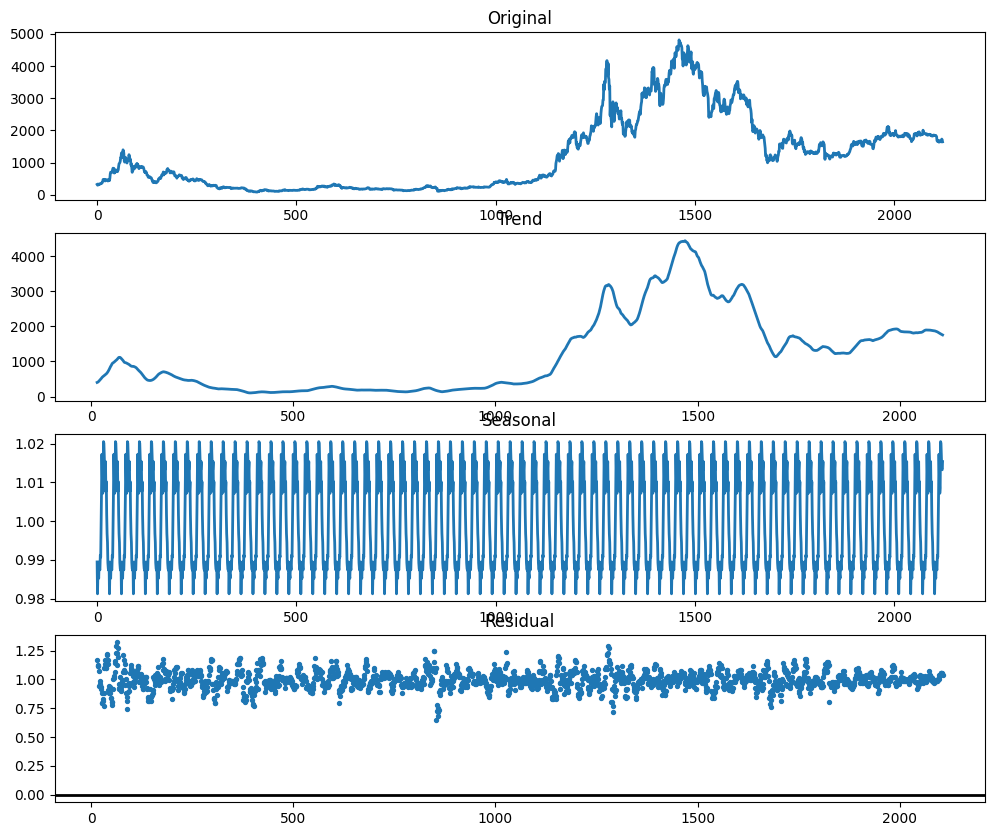

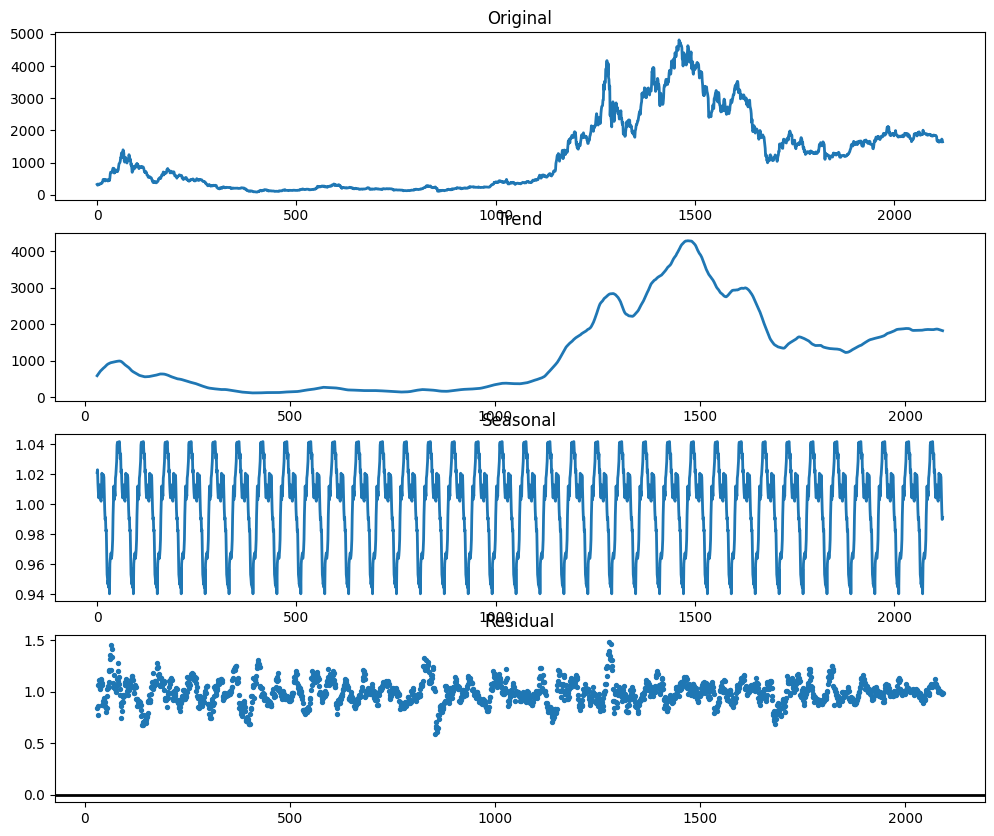

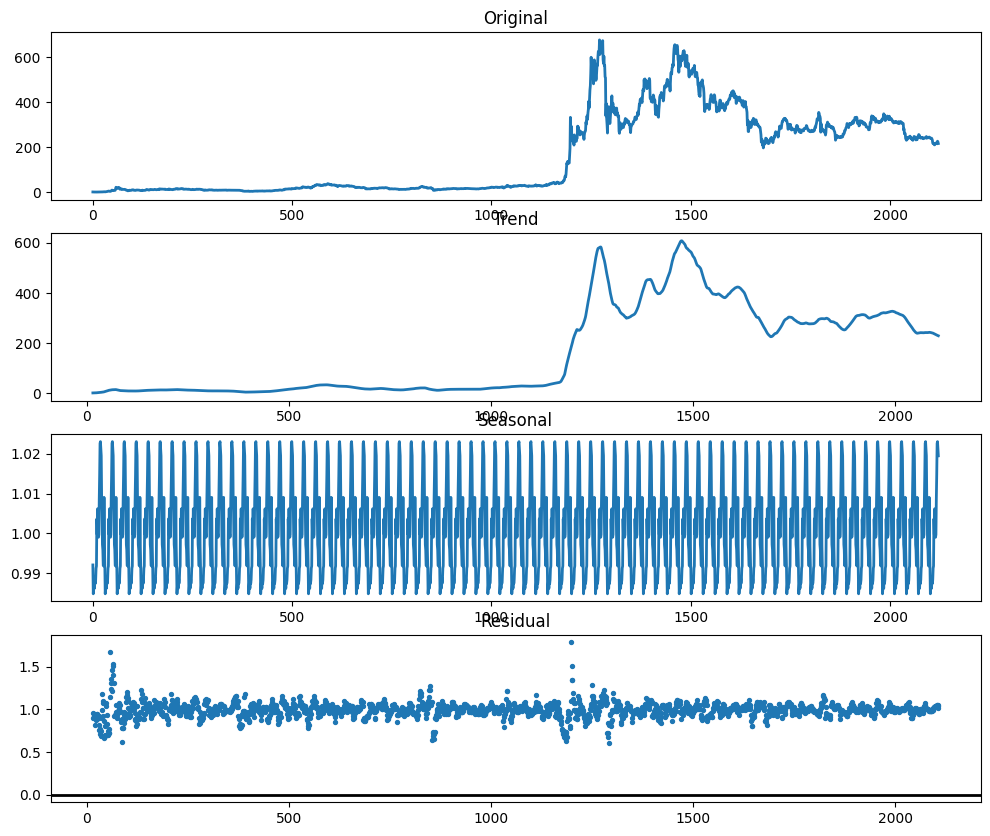

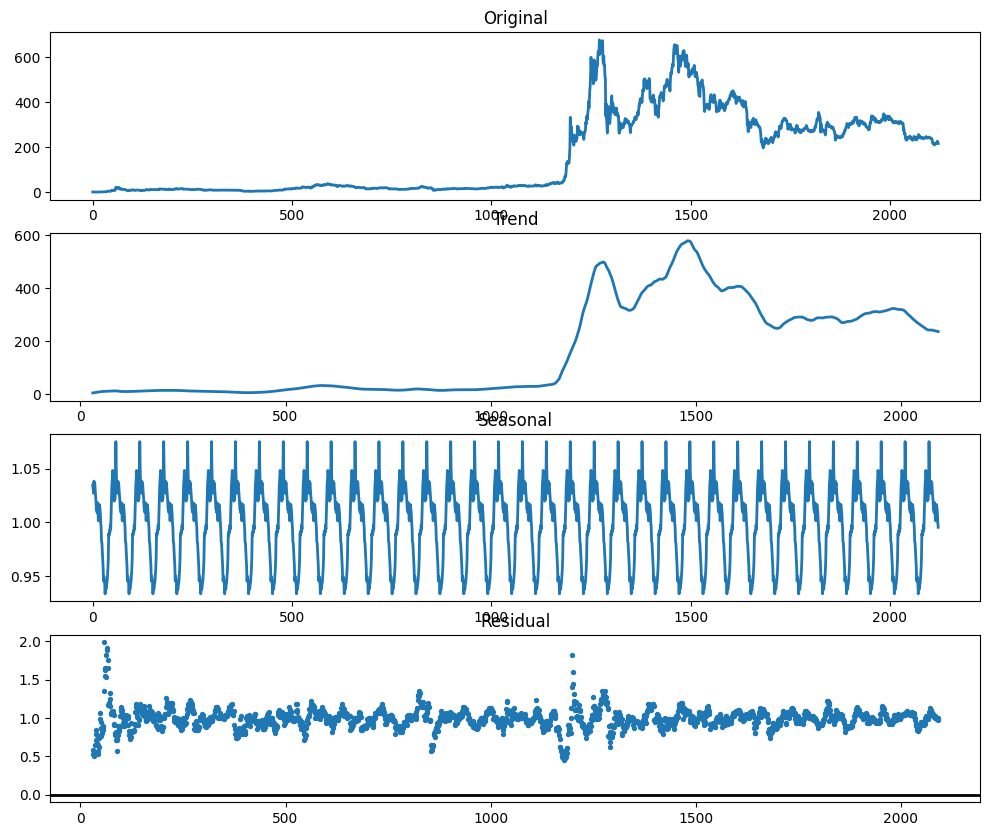

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

for file in file_list:
    for seasonal_period in seasonal_period_list:
        # google stock price is daily, so
        df=pd.read_csv('../Data/'+file+'.csv')        
        #df['Close'] = np.log(df['Close'])

        # Decompose the 'Close' column #multiplicative or additive
        decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=seasonal_period)

        # Extract the components
        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid

        # Plot the components
        fig, axes = plt.subplots(4, 1, figsize=(12, 10))  # Set the figure size

        # Plot the original series
        axes[0].plot(df['Close'], linewidth=2)  # Set the line width (point size)
        axes[0].set_title('Original')

        # Plot the trend component
        axes[1].plot(trend, linewidth=2)
        axes[1].set_title('Trend')

        # Plot the seasonal component
        axes[2].plot(seasonal, linewidth=2)
        axes[2].set_title('Seasonal')

        # Plot the residual component
        axes[3].scatter(residual.index, residual, s=8)
        axes[3].axhline(y=0, color='k', linestyle='-', linewidth=2)  # Horizontal line at y=0
        axes[3].set_title('Residual')

        # plt.tight_layout()
        # plt.show()
        fig_Name='figure/'+file+str(seasonal_period)+' TimeSeries.jpg'
        plt.savefig(fig_Name)